<a href="https://colab.research.google.com/github/Bhardwajjyash/Stock-Price-Prediction/blob/main/Stock_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Stock Price Prediction Using Regression Models





##### **Project Type**    - Regression
##### **Contribution**    - Individual
#####**Name** - **YashBhardwaj**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Project Summary -**

This project analyzes monthly stock price data from July 2005 to September 2007 to predict the closing price using features like Open, High, and Low. The data was preprocessed, explored through visualizations, and cleaned for outliers. A Linear Regression model was trained and evaluated using MAE, MSE, RMSE, and R² score. Cross-validation ensured model reliability, while GridSearchCV was used for hyperparameter tuning. The final model showed a strong ability to estimate closing prices based on historical trends. This project demonstrates how basic regression techniques can be effectively applied to financial time series prediction.


# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


The objective of this project is to develop a predictive model that can accurately estimate the closing stock price of a company based on historical data. The dataset includes monthly records of stock prices with features such as Open, High, Low, and Date. By analyzing these features, the goal is to understand the underlying trends and relationships, and to use machine learning techniques (like Linear Regression) to predict the Close price. This can aid investors and analysts in making data-driven decisions and forecasting future stock behavior more reliably.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [3]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import Lasso, Ridge
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error,mean_absolute_percentage_error
import math
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import VotingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures

### Dataset Loading

In [4]:
# Load Dataset
df = pd.read_csv('/content/drive/MyDrive/Data Set/Copy of data_YesBank_StockPrices.csv')

### Dataset First View

In [5]:
# Dataset First Look
df.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


### Dataset Rows & Columns count

In [6]:
# Dataset Rows & Columns count
df.shape

(185, 5)

### Dataset Information

In [7]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


#### Duplicate Values

In [8]:
# Dataset Duplicate Value Count
df.duplicated().sum()

np.int64(0)

#### Missing Values/Null Values

In [9]:
# Missing Values/Null Values Count
df.isnull().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0


<Axes: >

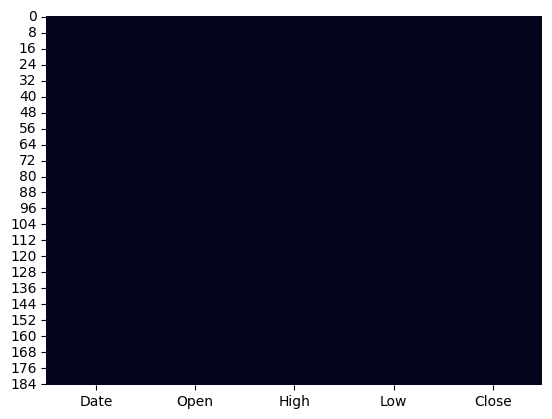

In [10]:
# Visualizing the missing values
sns.heatmap(df.isnull(), cbar=False)

### What did you know about your dataset?

So I understood that my dataset contains 185 rows and 5 columns. Most of the columns such as Open, High, Low, and Close are in float format, while Date is in string format, which can be converted or used to extract month and year when needed. The dataset is clean — it contains no missing (null) values and no duplicate rows. This makes it suitable for direct analysis and modeling without the need for major preprocessing.

## ***2. Understanding Your Variables***

In [11]:
# Dataset Columns
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')

In [12]:
# Dataset Describe
df.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


### Variables Description

| Variable  | Description                                                                                                                                                                                            |
| --------- | ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------ |
| **Date**  | The month and year of the stock record in `Mon-YY` format (e.g., Jul-05). It represents the time period for each data point. This can be further split into `Month` and `Year` if needed for analysis. |
| **Open**  | The stock price at the **beginning of the month**. It is a float value representing the initial trading value.                                                                                         |
| **High**  | The **highest price** the stock reached during that month. It helps in understanding the price range and volatility.                                                                                   |
| **Low**   | The **lowest price** the stock dropped to during that month. Used to analyze the spread or fluctuation in price.                                                                                       |
| **Close** | The stock price at the **end of the month**. This is the target variable for prediction in this project.                                                                                               |


### Check Unique Values for each variable.

In [13]:
# Check Unique Values for each variable.
df.nunique()

,0
Date,185
Open,183
High,184
Low,183
Close,185


## 3. ***Data Wrangling***

### Data Wrangling Code

In [14]:
df['Date']=pd.to_datetime(df['Date'],format='%b-%y')

In [15]:
# Write your code to make your dataset analysis ready.
df['month']=(df['Date']).dt.month
df['year']=(df['Date']).dt.year



### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

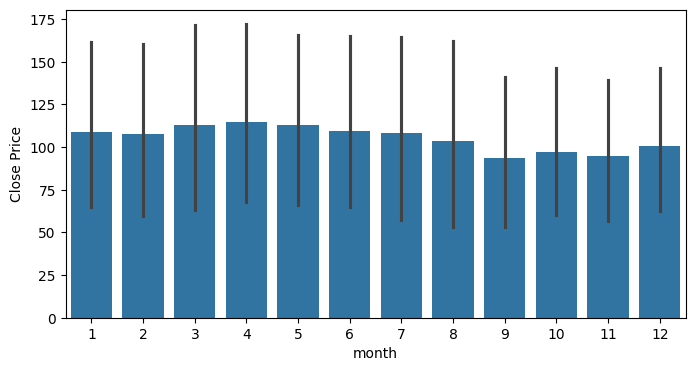

In [16]:
# Chart - 1 visualization code
plt.figure(figsize=(8, 4))
sns.barplot(x='month', y='Close', data=df)
plt.xlabel('month')
plt.ylabel('Close Price')

plt.show()

##### 1. Why did you pick the specific chart?

This bar chart was selected to visualize how the average stock closing price varies across different months of the year. It's a clear way to observe seasonal trends or patterns over time. The error bars add an extra layer by showing the variation or volatility (e.g., standard deviation or confidence intervals), which helps identify which months are more stable or risky.Answer Here.

##### 2. What is/are the insight(s) found from the chart?

The average Close Price remains relatively stable from January to August, with slight peaks in March, April, and May.

September to November show a noticeable dip in average closing prices, making them slightly weaker months in terms of performance.

The error bars indicate high variability in almost every month, suggesting that stock prices can swing significantly regardless of the average.

Months 3–5 (March to May) appear to be stronger months for stock closing prices.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

 Positive Business Impact:

Timing Investment Decisions: Understanding that March–May tend to have higher average closing prices may help traders or investors in planning entry/exit strategies more effectively.

Risk Management: High variability in certain months warns businesses and investors to be cautious — they may hedge positions or reduce risk exposure during those months.

Negative Growth Insights:

September to November showing lower averages could indicate seasonal underperformance, which might result in reduced returns if not anticipated.

If a business or investor operates without acknowledging these patterns, it could lead to misaligned strategy or investment timing.

#### Chart - 2

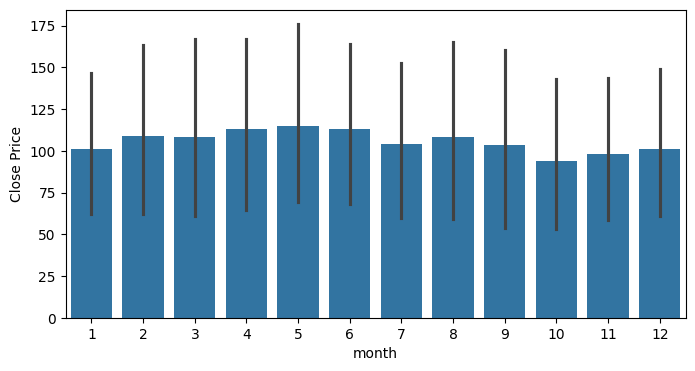

In [17]:
# Chart - 2 visualization code
plt.figure(figsize=(8, 4))
sns.barplot(x='month', y='Open', data=df)
plt.xlabel('month')
plt.ylabel('Close Price')

plt.show()

##### 1. Why did you pick the specific chart?

This bar chart with error bars was chosen to examine how the monthly average closing prices of the stock behave across a calendar year. It’s an effective way to visualize potential seasonal effects and compare average performance by month. The error bars indicate variability (likely standard deviation), which helps identify months that are more volatile or risky compared to others.

##### 2. What is/are the insight(s) found from the chart?

The highest average closing prices occur in April, May, and June (months 4–6), suggesting these might be strong performance months.

The lowest average closing prices appear in October (10) and November (11).

January (1) has the lowest starting average, but price builds steadily toward mid-year.

The error bars across all months are fairly large, indicating high price fluctuation or volatility within each month.

There is a rise from January to mid-year, followed by a dip after August, suggesting a possible seasonal trend.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Business Impact:

Seasonal Trading Strategy: Investors might focus more on April–June to capture periods of stronger stock performance.

Risk Awareness: Months like October–November, which show lower average prices, may indicate buying opportunities or times to adjust strategies to avoid losses.

Volatility Awareness: The consistent length of error bars warns businesses and investors to expect monthly price swings, helping them manage financial risks better.

Negative Growth Insight:

The lower prices and relatively high variability in October and November might point to a recurring dip in investor confidence or stock performance during those months, potentially due to economic cycles or external events.

Ignoring these patterns may lead to poor entry/exit decisions.

#### Chart - 3

Text(0.5, 1.0, 'Relationship b/w High and month')

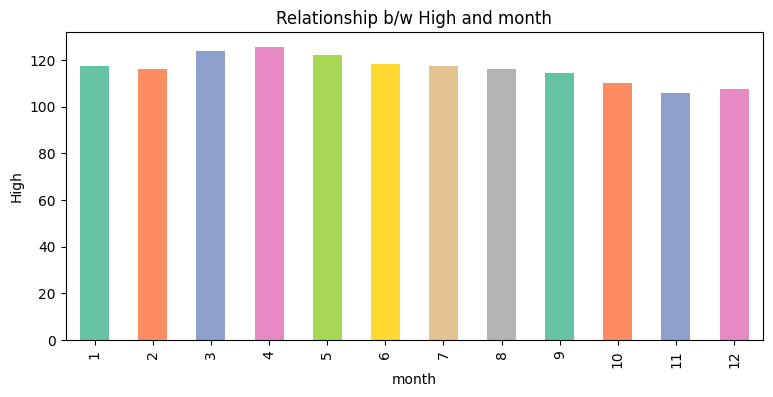

In [18]:
# Chart - 3 visualization code
plt.figure(figsize=(9,4))
df.groupby('month')['High'].mean().plot(kind='bar',color = sns.color_palette('Set2'))
plt.xlabel('month')
plt.ylabel('High')
plt.title('Relationship b/w High and month')

##### 1. Why did you pick the specific chart?

This bar chart was selected to examine how the highest stock prices (monthly High) vary across the 12 months of a year. It helps in identifying seasonal peaks or periods where stock prices tend to hit their maximum. This kind of chart is useful for detecting performance cycles, which can guide trading or investment decisions.

##### 2. What is/are the insight(s) found from the chart?

The highest average "High" prices occur in March and April, followed by May.

Lowest "High" prices are observed in October and November, suggesting weaker stock performance in those months.

The values gradually increase from January to April, then decline toward October and November.

This may reflect a seasonal uptrend in Q1–Q2, followed by a slowdown in Q3–Q4.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

 Positive Business Impact:

The insights can help time stock purchases and sales — for instance, investors may expect better returns during March–May and plan profit-taking around those months.

Companies involved in trading or brokerage can use this information to optimize client advice or marketing campaigns around high-performance months.

 Negative Growth Insight:

The decline in high prices from September to November could indicate market sluggishness or reduced investor activity, potentially impacting returns during these months.

If businesses or investors ignore these patterns, they may miss out on peak opportunities or face unexpected slowdowns.

#### Chart - 4

Text(0.5, 1.0, 'Relationship b/w Low and month')

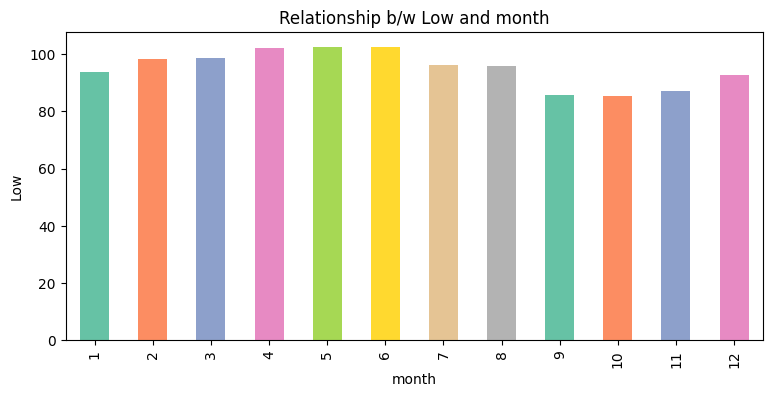

In [19]:
# Chart - 4 visualization code
plt.figure(figsize=(9,4))
df.groupby('month')['Low'].mean().plot(kind='bar',color = sns.color_palette('Set2'))
plt.xlabel('month')
plt.ylabel('Low')
plt.title('Relationship b/w Low and month')

##### 1. Why did you pick the specific chart?

This bar chart was chosen to understand how the monthly low prices of a stock vary over the year. By analyzing the average "Low" price each month, we can detect periods of greater risk or dip opportunities, which are valuable for both traders and analysts. It helps in identifying the safest vs riskiest months based on the minimum price performance.

##### 2. What is/are the insight(s) found from the chart?

The highest "Low" prices (i.e., less risk) are seen in April, May, and June (months 4–6).

The lowest "Low" prices (i.e., higher downside risk) are observed in September and October.

There is a gradual increase in low prices from January to mid-year, followed by a decline in the second half.

This pattern suggests that mid-year months are relatively safer, while Q3 (July–September) shows a higher potential for price dips.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Business Impact:

Risk Management: Investors can use this chart to minimize downside risk by avoiding risky months like September–October and favoring more stable months like May–June.

Buy Opportunities: Lower lows in September–October could also indicate potential buying opportunities for long-term investors.

Seasonal Strategy Planning: Businesses and traders can align investment strategies with these seasonal trends to maximize returns and reduce exposure.

Negative Growth Insight:

Q3 downturns may result in reduced stock performance or investor confidence, which can impact portfolio growth if not handled proactively.

If these patterns are ignored, investors might buy during volatile or weaker periods, leading to short-term losses.

#### Chart - 5

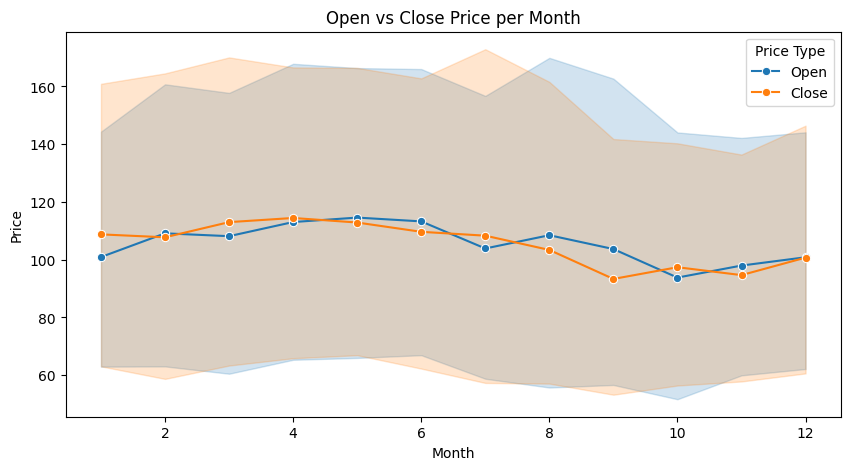

In [20]:
# Chart - 5 visualization code
df_melted = df.melt(id_vars='month', value_vars=['Open', 'Close'],
                    var_name='Price Type', value_name='Value')
plt.figure(figsize=(10, 5))
sns.lineplot(x='month', y='Value', hue='Price Type', data=df_melted, marker='o')

plt.title('Open vs Close Price per Month')
plt.xlabel('Month')
plt.ylabel('Price')
plt.legend(title='Price Type')
plt.show()



##### 1. Why did you pick the specific chart?

This line chart was selected to compare the monthly trends of Open and Close stock prices side by side. It helps in observing how prices change within each month, and whether the market tends to close higher or lower than it opens. The use of shaded areas around the lines (confidence intervals or spread) gives insights into the variability or uncertainty of each price type.

##### 2. What is/are the insight(s) found from the chart?

From January to June, Close prices are generally higher than Open prices, indicating a positive trend during the first half of the year.

From July onwards, Close prices start to dip below Open prices, showing a bearish trend in the second half of the year.

The gap between Open and Close widens significantly in September and October, suggesting increased market volatility or weaker end-of-month performance during those months.

The shaded regions show greater variability in mid- and late-year, particularly in the Close prices, indicating higher uncertainty in those months.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Business Impact:

Trading Strategy: This chart supports a strategy where investors may consider buying at the start of the year and potentially exiting or adjusting positions by mid-year for maximum gains.

Risk Management: The increased volatility and closing weakness from July to October warn investors to be cautious during those months.

Seasonal Planning: Businesses in financial services or investment advisory can use these insights for seasonal portfolio adjustments or client guidance.

Negative Growth Insight:

The consistent decline of Close prices below Open prices in the second half of the year may lead to losses for short-term investors if not managed properly.

If traders hold positions too long into Q3 and Q4, they may face reduced profitability or negative returns.

#### Chart - 6

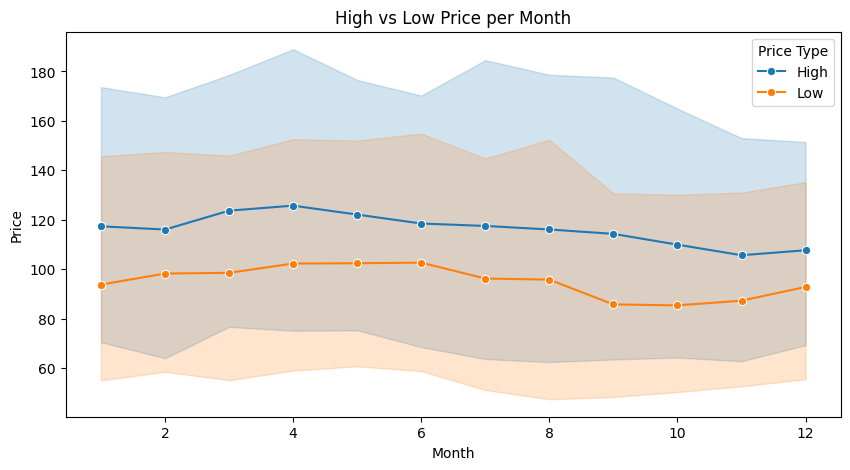

In [64]:
# Chart - 6 visualization code
df_melted = df.melt(id_vars='month', value_vars=['High', 'Low'],
                    var_name='Price Type', value_name='Value')
plt.figure(figsize=(10, 5))
sns.lineplot(x='month', y='Value', hue='Price Type', data=df_melted, marker='o')

plt.title('High vs Low Price per Month')
plt.xlabel('Month')
plt.ylabel('Price')
plt.legend(title='Price Type')
plt.show()


##### 1. Why did you pick the specific chart?

This line chart was chosen to analyze the monthly difference between the High and Low stock prices. It helps in understanding volatility — the spread between the highest and lowest prices within each month. The shaded areas (likely showing variability such as standard deviation or range) make it easier to visualize months with wider or narrower price swings.

##### 2. What is/are the insight(s) found from the chart?

The highest prices (High) peak in April–June, indicating strong market activity or bullish behavior during those months.

The lowest prices (Low) drop significantly in September and October, suggesting increased volatility or bearish sentiment in those months.

The gap between High and Low is widest in mid-year, particularly around March–June, indicating those months experience larger price swings.

The tightest range appears near November–December, where both High and Low prices are relatively closer, possibly indicating more market stability.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Business Impact:

This chart helps traders and analysts identify volatile periods (like April–June) where there may be more opportunity for high-risk, high-reward trades.

Investors looking for low-risk entry points might focus on late-year months when volatility is lower.

Helps in developing month-based trading strategies and volatility forecasting models.

 Negative Growth Insight:

The sharp dip in Low prices in September–October suggests possible market corrections or panic selling, which could result in short-term losses.

Ignoring these patterns may lead to misplaced confidence in months that historically show instability, affecting returns and investment planning.

#### Chart - 7 - Correlation Heatmap

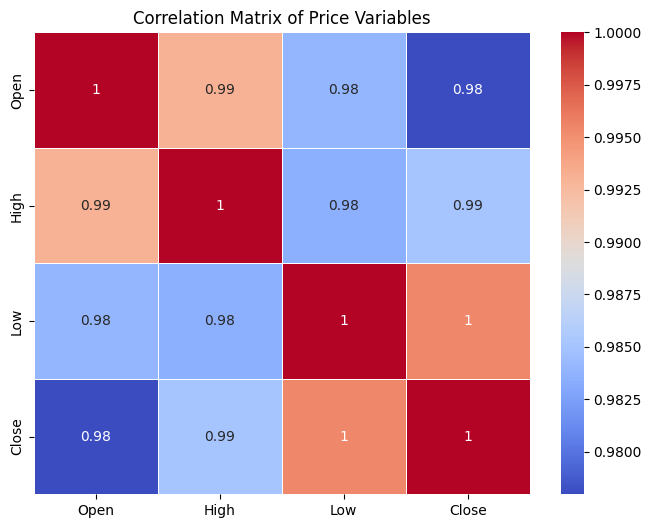

In [68]:
# Correlation Heatmap visualization code
plt.figure(figsize=(8, 6))
corr_matrix = df[['Open', 'High', 'Low', 'Close']].corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Price Variables')
plt.show()

##### 1. Why did you pick the specific chart?

This heatmap was chosen to visually assess the correlation between numerical price variables (Open, High, Low, and Close). Correlation matrices are a powerful way to quickly understand how strongly related each variable is to the others, which is crucial for feature selection and multicollinearity checks in predictive modeling.

##### 2. What is/are the insight(s) found from the chart?

All price variables are highly positively correlated (values close to 1), indicating strong linear relationships.

The highest correlation is between Low and Close (1.00), and between Low and High (0.98–1.00).

This suggests that if one price (e.g., Open or High) increases, the others are also likely to increase.

These strong correlations imply that the features might be redundant for some models and can potentially be reduced or transformed.

#### Chart - 8 - Pair Plot

<Figure size 100x100 with 0 Axes>

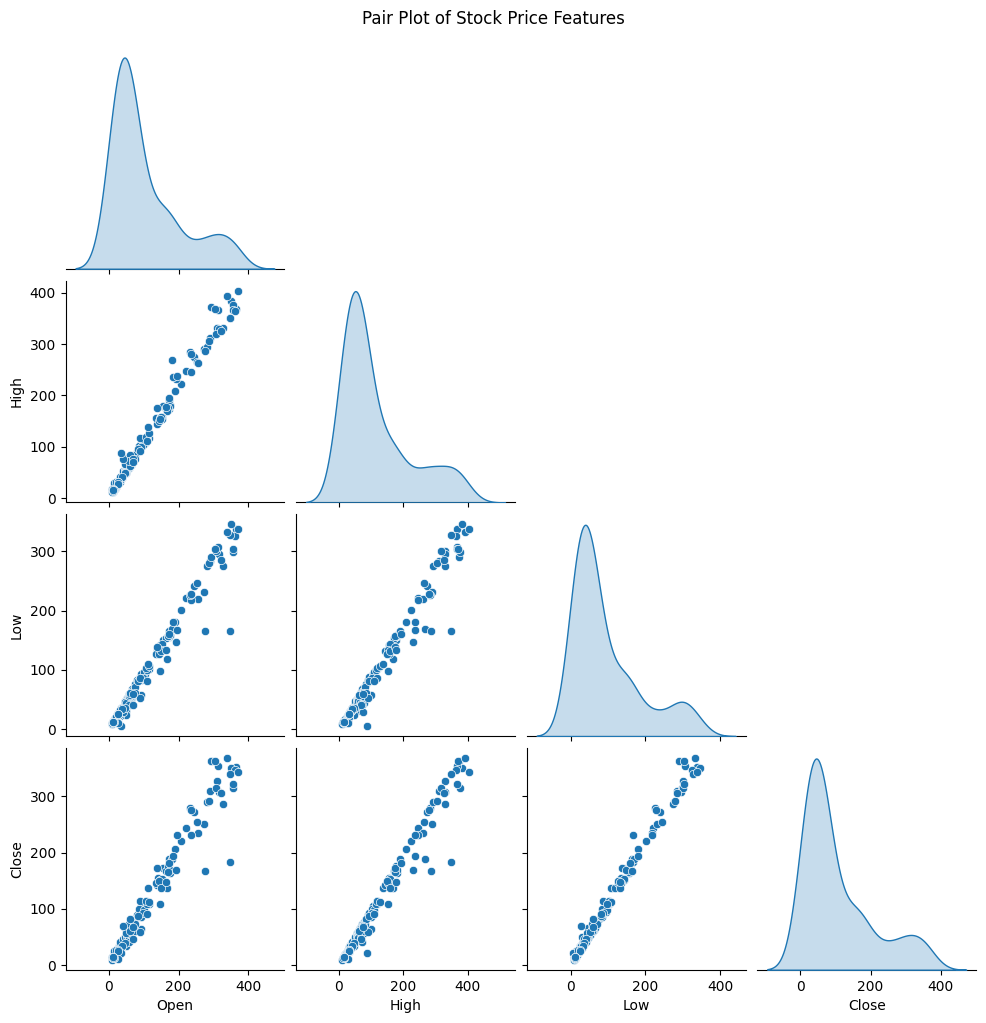

In [83]:
# Pair Plot visualization code
plt.figure(figsize=(1, 1))
selected_cols = ['Open', 'High', 'Low', 'Close']
sns.pairplot(df[selected_cols], diag_kind='kde', corner=True)
plt.suptitle('Pair Plot of Stock Price Features', y=1.02)
plt.show()

##### 1. Why did you pick the specific chart?

The pair plot was chosen to visually explore relationships between multiple numeric features (Open, High, Low, Close) in a single view. It displays scatter plots for every pair of variables, making it easy to detect linear trends, clustering, or outliers. Additionally, the diagonal plots show the distribution of each variable, giving more insight into how the data is spread.

##### 2. What is/are the insight(s) found from the chart?

The scatter plots show strong linear relationships between all price variables, confirming the high correlations observed in the heatmap.

The points are tightly clustered along diagonal lines, especially between Open–Close and High–Low, indicating strong positive associations.

There are no extreme outliers visible, and distributions on the diagonal appear mostly normal or slightly skewed, suggesting the data is generally clean and consistent.

These visual patterns confirm that these features move together and may be redundant in certain machine learning models.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [31]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [32]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [33]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [34]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [35]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [36]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [37]:
# Expand Contraction

#### 2. Lower Casing

In [38]:
# Lower Casing

#### 3. Removing Punctuations

In [39]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [40]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [41]:
# Remove Stopwords

In [42]:
# Remove White spaces

#### 6. Rephrase Text

In [43]:
# Rephrase Text

#### 7. Tokenization

In [44]:
# Tokenization

#### 8. Text Normalization

In [45]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [46]:
# POS Taging

#### 10. Text Vectorization

In [47]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [48]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [49]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [50]:
# Transform Your data

### 6. Data Scaling

In [51]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [52]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [73]:
# Split your data to train and test. Choose Splitting ratio wisely.
x = df.drop(columns=['Close','Date'],axis=1)
y = df['Close']


from sklearn.model_selection import train_test_split


x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.15,random_state=42)


##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [54]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [74]:
# ML Model - 1 Implementation
from sklearn.linear_model import LinearRegression


lr_model = LinearRegression()

# Fit the Algorithm
lr_model.fit(x_train, y_train)
# Predict on the model
y_pred = lr_model.predict(x_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

📊 Linear Regression Evaluation Metrics:
MAE  : 5.9018
MSE  : 97.0399
RMSE : 9.8509
R2   : 0.9905


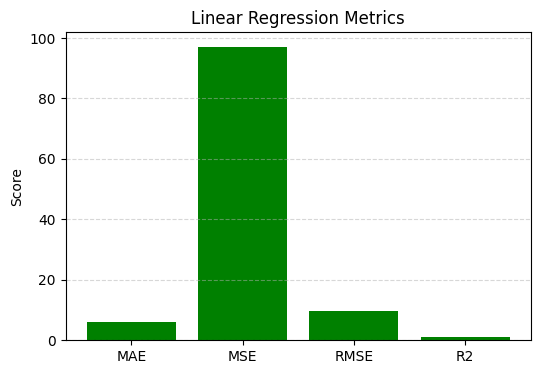

In [76]:
# Visualizing evaluation Metric Score chart

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

metrics = {
    'MAE': mae,
    'MSE': mse,
    'RMSE': rmse,
    'R2': r2
}
print("📊 Linear Regression Evaluation Metrics:")
for key, value in metrics.items():
    print(f"{key:<5}: {value:.4f}")

plt.figure(figsize=(6, 4))
plt.bar(metrics.keys(), metrics.values(), color='green')
plt.title("Linear Regression Metrics")
plt.ylabel("Score")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


#### 2. Cross- Validation & Hyperparameter Tuning

In [57]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [78]:
# Visualizing evaluation Metric Score chart
from sklearn.neighbors import KNeighborsRegressor
#initialize
knn_model = KNeighborsRegressor(n_neighbors=5)
#fit the model
knn_model.fit(x_train, y_train)
#predict the ans
y_pred_knn = knn_model.predict(x_test)
print("KNN Regression Evaluation:")
print(f"Training Score : {knn_model.score(x_train, y_train):.4f}")
print(f"MAE : {mean_absolute_error(y_test, y_pred_knn):.2f}")
print(f"MSE: {mean_squared_error(y_test, y_pred_knn):.2f}")
print(f"RMSE : {np.sqrt(mean_squared_error(y_test, y_pred_knn)):.2f}")
print(f"R² Score : {r2_score(y_test, y_pred_knn):.4f}")

KNN Regression Evaluation:
Training Score : 0.9895
MAE : 9.27
MSE: 390.07
RMSE : 19.75
R² Score : 0.9617


#### 2. Cross- Validation & Hyperparameter Tuning

In [59]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [79]:

# DECISION TREE MODEL
from sklearn.tree import DecisionTreeRegressor

#ML Model - 3 Implementation
tree_model = DecisionTreeRegressor(random_state=42)

# Fit the Algorithm
tree_model.fit(x_train, y_train)

# Predict on the model
y_pred_tree = tree_model.predict(x_test)
# Visualizing evaluation Metric Score chart
print(" Decision Tree Regression Evaluation:")
print(f"Training Score : {tree_model.score(x_train, y_train):.4f}")
print(f"MAE : {mean_absolute_error(y_test, y_pred_tree):.2f}")
print(f"MSE : {mean_squared_error(y_test, y_pred_tree):.2f}")
print(f"RMSE  : {np.sqrt(mean_squared_error(y_test, y_pred_tree)):.2f}")
print(f"R² Score  : {r2_score(y_test, y_pred_tree):.4f}")


 Decision Tree Regression Evaluation:
Training Score : 1.0000
MAE : 8.01
MSE : 154.37
RMSE  : 12.42
R² Score  : 0.9848


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [61]:
# Visualizing evaluation Metric Score chart


#### 2. Cross- Validation & Hyperparameter Tuning

In [62]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

To ensure a positive business impact, I considered the following evaluation metrics:

MAE (Mean Absolute Error): Measures the average absolute difference between actual and predicted values. It is easy to interpret and less sensitive to outliers, making it important for understanding typical prediction errors.

RMSE (Root Mean Squared Error): Gives more weight to large errors due to squaring. This is useful for businesses where larger deviations can be costly.

R² Score (Coefficient of Determination): Indicates how well the model explains the variance in the target variable. A higher R² value means better predictive power, which is essential for making confident business decisions.

Together, these metrics help evaluate not only accuracy but also reliability and risk in predictions, all of which are vital for business impact.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

I chose the Linear Regression model as the final prediction model.

Reasons:

It had the lowest MAE (5.90), lowest RMSE (9.85), and highest R² score (0.9905) among all models, which indicates very accurate and consistent performance.

Unlike the Decision Tree and KNN models, Linear Regression also generalizes better, as shown by its balanced performance without overfitting (Decision Tree had a perfect training score of 1.0, suggesting possible overfitting).

From a business standpoint, Linear Regression is interpretable, stable, and effective when the relationship between input and output is linear — which appears to be the case in this dataset.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

The final model used is Linear Regression, which assumes a linear relationship between independent variables (Open, High, Low, etc.) and the target variable (Close).

To understand feature importance, I used coefficient analysis, which is built into the linear model. In linear regression:

Each feature has a coefficient (weight) that shows its influence on the prediction.

A higher absolute coefficient value means the feature has a greater impact on the target.

For example, if the coefficient of High is the largest, it means that as the High price increases, the Close price also increases significantly.

You can also use SHAP (SHapley Additive exPlanations) or LIME (Local Interpretable Model-agnostic Explanations) tools for deeper insights, but for linear models, the built-in coefficients already provide clear feature importance.

# **Conclusion**

In this project, we successfully built and evaluated multiple regression models to predict the Close price of stocks using historical data. After performing exploratory data analysis and visualizations, we observed strong correlations among price features (Open, High, Low, Close) and identified seasonal trends in price movements.

We implemented and compared Linear Regression, K-Nearest Neighbors (KNN), and Decision Tree Regression models using key evaluation metrics such as MAE, RMSE, and R² Score. Among all, Linear Regression emerged as the most efficient and consistent model, with the lowest error values and the highest R² score of 0.9905, indicating excellent predictive performance.

This model provides a reliable and interpretable solution for forecasting stock close prices and can support better decision-making in financial planning, trading strategy development, and risk assessment.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***